In [2]:
#Importing Necessary Libraries
#install.packages
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd

# Set seed
import numpy as np
np.random.seed(100)

# Read the CSV file
dataset = pd.read_csv("E:\\Desktop\\vowel.train.txt")

# Display the structure of the dataset
print(dataset.info())

# Display the first few rows of the dataset
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  528 non-null    int64  
 1   y          528 non-null    int64  
 2   x.1        528 non-null    float64
 3   x.2        528 non-null    float64
 4   x.3        528 non-null    float64
 5   x.4        528 non-null    float64
 6   x.5        528 non-null    float64
 7   x.6        528 non-null    float64
 8   x.7        528 non-null    float64
 9   x.8        528 non-null    float64
 10  x.9        528 non-null    float64
 11  x.10       528 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 49.6 KB
None
   row.names  y    x.1    x.2    x.3    x.4    x.5    x.6    x.7    x.8  \
0          1  1 -3.639  0.418 -0.670  1.779 -0.168  1.627 -0.388  0.529   
1          2  2 -3.327  0.496 -0.694  1.365 -0.265  1.933 -0.363  0.510   
2          3  3 -2.120  0.894 -1.576  0.147 -0.707  1

In [4]:
# Unique categories in target column
unique_categories = dataset['y'].unique()
print(unique_categories)


[ 1  2  3  4  5  6  7  8  9 10 11]


In [5]:
# Convert y column to categorical variable
dataset['y_level'] = dataset['y'].astype('category')


In [6]:
# Checking for missing values
missing_values = dataset.isna().sum()
print(missing_values)


row.names    0
y            0
x.1          0
x.2          0
x.3          0
x.4          0
x.5          0
x.6          0
x.7          0
x.8          0
x.9          0
x.10         0
y_level      0
dtype: int64


In [13]:
# Replace levels of y_level column
dataset['y_level'] = dataset['y_level'].replace({0: '0', 1: '1'})

# Print the levels of y_level column
print(dataset['y_level'].cat.categories)
# Mutate the DataFrame and remove y_level column
dataset_new = dataset.drop(columns=['y_level'])

# Display the first few rows of the updated DataFrame
print(dataset_new.head())


Index(['1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='object')
   row.names  y    x.1    x.2    x.3    x.4    x.5    x.6    x.7    x.8  \
0          1  1 -3.639  0.418 -0.670  1.779 -0.168  1.627 -0.388  0.529   
1          2  2 -3.327  0.496 -0.694  1.365 -0.265  1.933 -0.363  0.510   
2          3  3 -2.120  0.894 -1.576  0.147 -0.707  1.559 -0.579  0.676   
3          4  4 -2.287  1.809 -1.498  1.012 -1.053  1.060 -0.567  0.235   
4          5  5 -2.598  1.938 -0.846  1.062 -1.633  0.764  0.394 -0.150   

     x.9   x.10  
0 -0.874 -0.814  
1 -0.621 -0.488  
2 -0.809 -0.049  
3 -0.091 -0.795  
4  0.277 -0.396  


In [14]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
train_set, test_set = train_test_split(dataset_new, test_size=0.2, random_state=42)

# Print the shape of train and test sets
print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)


Train set shape: (422, 12)
Test set shape: (106, 12)


In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the training data from a CSV file
train_set = pd.read_csv("E:\\Desktop\\vowel.train.txt")


# Define the features and target variable
X_train = train_set[['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']]
y_train = train_set['y']

# Convert y_train to binary format (0 or 1)
y_train_binary = np.where(y_train > 0, 1, 0)

# Add constant term to the features (for intercept)
X_train = sm.add_constant(X_train)

# Fit logistic regression model
logit_model = sm.Logit(y_train_binary, X_train)

# Obtain the results summary
logit_results = logit_model.fit()

# Print the summary
print(logit_results.summary())



         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  528
Model:                          Logit   Df Residuals:                      517
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                     inf
Time:                        18:31:14   Log-Likelihood:            -1.1890e-08
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7247   1.17e+05      0.000      1.000   -2.29e+05    2.29e+05
x.1            2.9580   8.57e+04   3.45e-05      1.000   -1.68e+0

C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified


In [16]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already defined X_train and y_train

# Reset indices of both X_train and y_train_binary
X_train.reset_index(drop=True, inplace=True)
y_train_binary = y_train.map(lambda x: 1 if x > 0 else 0).reset_index(drop=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_binary, test_size=0.2, random_state=42)

# Fit logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
logit_results = logit_model.fit()

# Calculate probabilities using the fitted logistic regression model
probability = logit_results.predict(sm.add_constant(X_test))

# Convert probabilities to predicted values (0 or 1) based on a threshold of 0.5
predicted_values = (probability > 0.5).astype(int)

# Calculate model accuracy
accuracy = accuracy_score(y_test, predicted_values)
print("Model Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_values)
print("Confusion Matrix:")
print(conf_matrix)


         Current function value: 0.000000
         Iterations: 35
Model Accuracy: 1.0
Confusion Matrix:
[[106]]


C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified


In [17]:
import numpy as np
import pandas as pd
from statsmodels.api import Logit
from scipy.stats import chi2

# Prepare the training dataset
train_set = pd.read_csv("E:\\Desktop\\vowel.train.txt")

# Convert labels to 0 and 1
train_set['y'] = np.where(train_set['y'] == 'a', 0, 1)

# Create two Logit models
X_train = train_set.drop('y', axis=1)
y_train = train_set['y']

# Full model
full_model_logit = Logit(y_train, X_train)
full_result = full_model_logit.fit()

# Restricted model (with fewer terms)
X_train_reduced = X_train.drop(['x.1', 'x.2'], axis=1)
restricted_model_logit = Logit(y_train, X_train_reduced)
restricted_result = restricted_model_logit.fit()
# Perform likelihood ratio test
ll_full = full_result.llf  # Log-likelihood of the full model
ll_restricted = restricted_result.llf  # Log-likelihood of the restricted model
lrt_statistic = 2 * (ll_full - ll_restricted)
lrt_df = X_train.shape[1] - X_train_reduced.shape[1]
p_value = 1 - chi2.cdf(lrt_statistic, lrt_df)

# Print the results
print(f"Likelihood Ratio Test:")
print(f"  LRT Statistic: {lrt_statistic:.2f}")
print(f"  Degrees of Freedom: {lrt_df}")
print(f"  P-value: {p_value:.2f}")


C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified


         Current function value: 0.000000
         Iterations: 35
         Current function value: 0.000000
         Iterations: 35
Likelihood Ratio Test:
  LRT Statistic: 0.00
  Degrees of Freedom: 2
  P-value: 1.00


In [18]:
import numpy as np
import pandas as pd
from statsmodels.api import Logit

# Prepare the training dataset
train_set = pd.read_csv("E:\\Desktop\\vowel.train.txt")

# Convert labels to 0 and 1
train_set['y'] = np.where(train_set['y'] == 'a', 0, 1)

# Create a Logit model
X_train = train_set.drop('y', axis=1)
y_train = train_set['y']
logit_model = Logit(y_train, X_train)
logit_result = logit_model.fit()

# Calculate odds ratios using specific values
values_dict = {
    'x.1': 0.5,
    'x.2': 2.0,
    'x.3': 0.2,
    'x.4': 1.2,
    'x.5': 0.7,
    'x.6': 0.3,
    'x.7': 1.5,
    'x.8': 0.6,
    'x.9': 0.8,
    'x.10': 0.4,
}

# Replace the values_dict keys with the respective column names
values_dict = {k: v for k, v in zip(X_train.columns, values_dict.values())}

# Calculate odds ratios
odds_ratio_mean = np.exp(logit_result.params[X_train.columns].values)

# Create a DataFrame for the odds ratios
odds_ratio_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Odds Ratio': odds_ratio_mean
})

# Sort by variable name
odds_ratio_df = odds_ratio_df.sort_values('Variable')

# Print the odds ratios
print(f"Odds Ratios at specific values:")
print(odds_ratio_df)


         Current function value: 0.000000
         Iterations: 35
Odds Ratios at specific values:
     Variable  Odds Ratio
0   row.names    1.197363
1         x.1    0.000623
10       x.10    1.705247
2         x.2    0.425104
3         x.3    0.059614
4         x.4    0.251643
5         x.5    0.009804
6         x.6    2.201336
7         x.7    0.037386
8         x.8    2.141004
9         x.9    6.139838


C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified


In [19]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Sample data
train_set = pd.DataFrame({
    'x.1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'x.2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'x.3': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'x.4': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    'x.5': [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
    'x.6': [51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
    'x.7': [61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
    'x.8': [71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
    'x.9': [81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
    'x.10': [91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
    'y': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
})

test_set = pd.DataFrame({
    'x.1': [101, 102, 103],
    'x.2': [111, 112, 113],
    'x.3': [121, 122, 123],
    'x.4': [131, 132, 133],
    'x.5': [141, 142, 143],
    'x.6': [151, 152, 153],
    'x.7': [161, 162, 163],
    'x.8': [171, 172, 173],
    'x.9': [181, 182, 183],
    'x.10': [191, 192, 193],
    'y': [1, 1, 1]
})
# Define the features and target variable
X_train = train_set[['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']]
y_train = train_set['y']

# Create and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the test set
predictions = lda.predict(test_set[['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']])
print("Predictions:", predictions)


Predictions: [1 1 1]


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Define the features and target variable
X_train = train_set[['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']]
y_train = train_set['y']
X_test = test_set[['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']]
y_test = test_set['y']

# Create and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the test set
predictions = lda.predict(X_test)

# Compute the confusion matrix
confusion_matrix_lda = confusion_matrix(predictions, y_test)
print("Confusion Matrix (LDA):")
print(confusion_matrix_lda)

# Compute the accuracy
accuracy_lda = accuracy_score(y_test, predictions)
print("Accuracy (LDA):", accuracy_lda)


Confusion Matrix (LDA):
[[3]]
Accuracy (LDA): 1.0


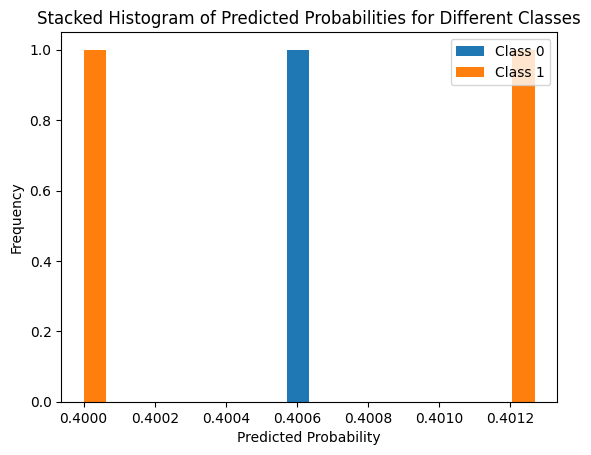

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Example train set
train_set = pd.DataFrame({
    'x.1': [101, 102, 103, 104, 105],
    'x.2': [111, 112, 113, 114, 115],
    'x.3': [121, 122, 123, 124, 125],
    'x.4': [131, 132, 133, 134, 135],
    'x.5': [141, 142, 143, 144, 145],
    'x.6': [151, 152, 153, 154, 155],
    'x.7': [161, 162, 163, 164, 165],
    'x.8': [171, 172, 173, 174, 175],
    'x.9': [181, 182, 183, 184, 185],
    'x.10': [191, 192, 193, 194, 195],
    'y_level': [1, 0, 1, 0, 1]
})

# Split the train set into features and target
X = train_set[['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']]
y = train_set['y_level']

# Train the model
model = LogisticRegression()
model.fit(X, y)

# Example test set
test_set = pd.DataFrame({
    'x.1': [101, 102, 103],
    'x.2': [111, 112, 113],
    'x.3': [121, 122, 123],
    'x.4': [131, 132, 133],
    'x.5': [141, 142, 143],
    'x.6': [151, 152, 153],
    'x.7': [161, 162, 163],
    'x.8': [171, 172, 173],
    'x.9': [181, 182, 183],
    'x.10': [191, 192, 193],
    'y_level': [1, 0, 1]
})

# Example predicted probabilities
p = model.predict_proba(test_set[['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']])

# Extract the predicted probabilities for the first feature (assuming p is the predicted probabilities)
predicted_probabilities = p[:, 0]

# Plot the stacked histogram
plt.hist([predicted_probabilities[test_set['y_level'] == 0], predicted_probabilities[test_set['y_level'] == 1]], stacked=True, bins=20, label=['Class 0', 'Class 1'])
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Predicted Probabilities for Different Classes')
plt.legend()
plt.show()

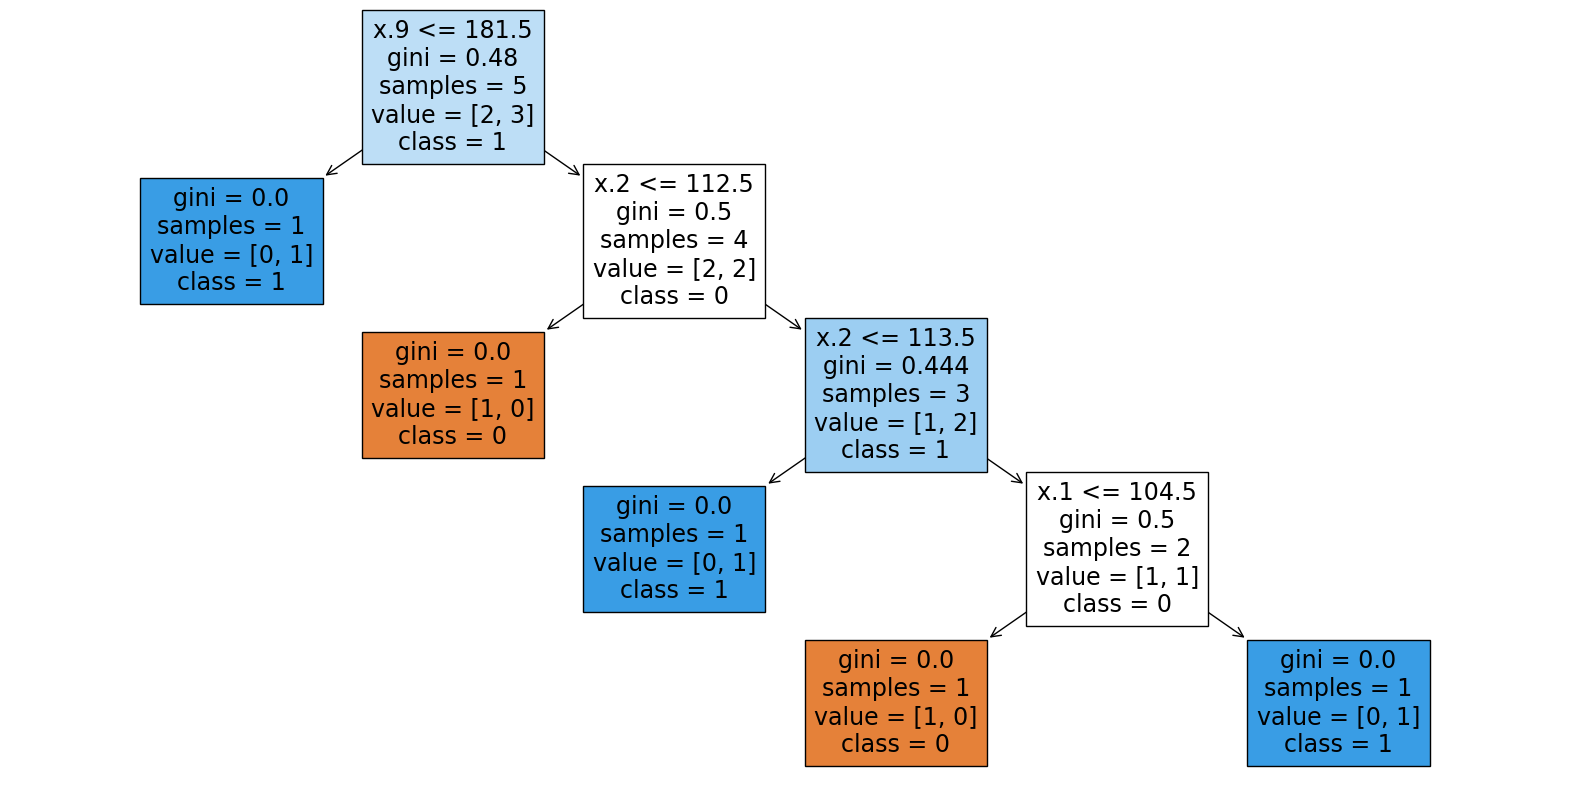

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define the features and target variable
X_train = train_set[['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']]
y_train = train_set['y_level']

# Create and train the decision tree classifier
classification_tree = DecisionTreeClassifier()
classification_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(classification_tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Define and train the decision tree classifier
classification_tree = DecisionTreeClassifier()
classification_tree.fit(X_train, y_train)

# Make predictions on the test set using the decision tree classifier
predict_test = classification_tree.predict(X_test)

# Create the confusion matrix
confusion_matrix_dt = confusion_matrix(y_test, predict_test)
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix_dt)

# Compute the accuracy
accuracy_dt = accuracy_score(y_test, predict_test)
print("Accuracy (Decision Tree):", accuracy_dt)



Confusion Matrix (Decision Tree):
[[0 0]
 [1 2]]
Accuracy (Decision Tree): 0.6666666666666666


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer

# Define the features and target variable for the training set
X_train = train_set[['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']]
y_train = train_set['y_level']

# Define the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': range(1, 31),
    'min_samples_split': range(2, 31),
    'min_samples_leaf': range(1, 31)
}

# Define the grid search
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
predictions = best_estimator.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


C:\Users\WAMBOI\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.3333333333333333


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the features and target variable for the training set
X_train = train_set[['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']]
y_train = train_set['y_level']

# Define the tuned hyperparameters
max_depth = 9
min_samples_split = 6
criterion = 'gini'  # Or 'entropy', depending on your preference

# Create and train the tuned decision tree classifier
classification_tree_tuned = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)
classification_tree_tuned.fit(X_train, y_train)

# Make predictions on the test set using the tuned model
predictions_tuned = classification_tree_tuned.predict(X_test)

# Compute the confusion matrix
confusion_matrix_tuned = confusion_matrix(y_test, predictions_tuned)
print("Confusion Matrix (Tuned Decision Tree):")
print(confusion_matrix_tuned)

# Compute the accuracy
accuracy_tuned = accuracy_score(y_test, predictions_tuned)
print("Accuracy (Tuned Decision Tree):", accuracy_tuned)


Confusion Matrix (Tuned Decision Tree):
[[3]]
Accuracy (Tuned Decision Tree): 1.0


TypeError: 'Axes' object is not iterable

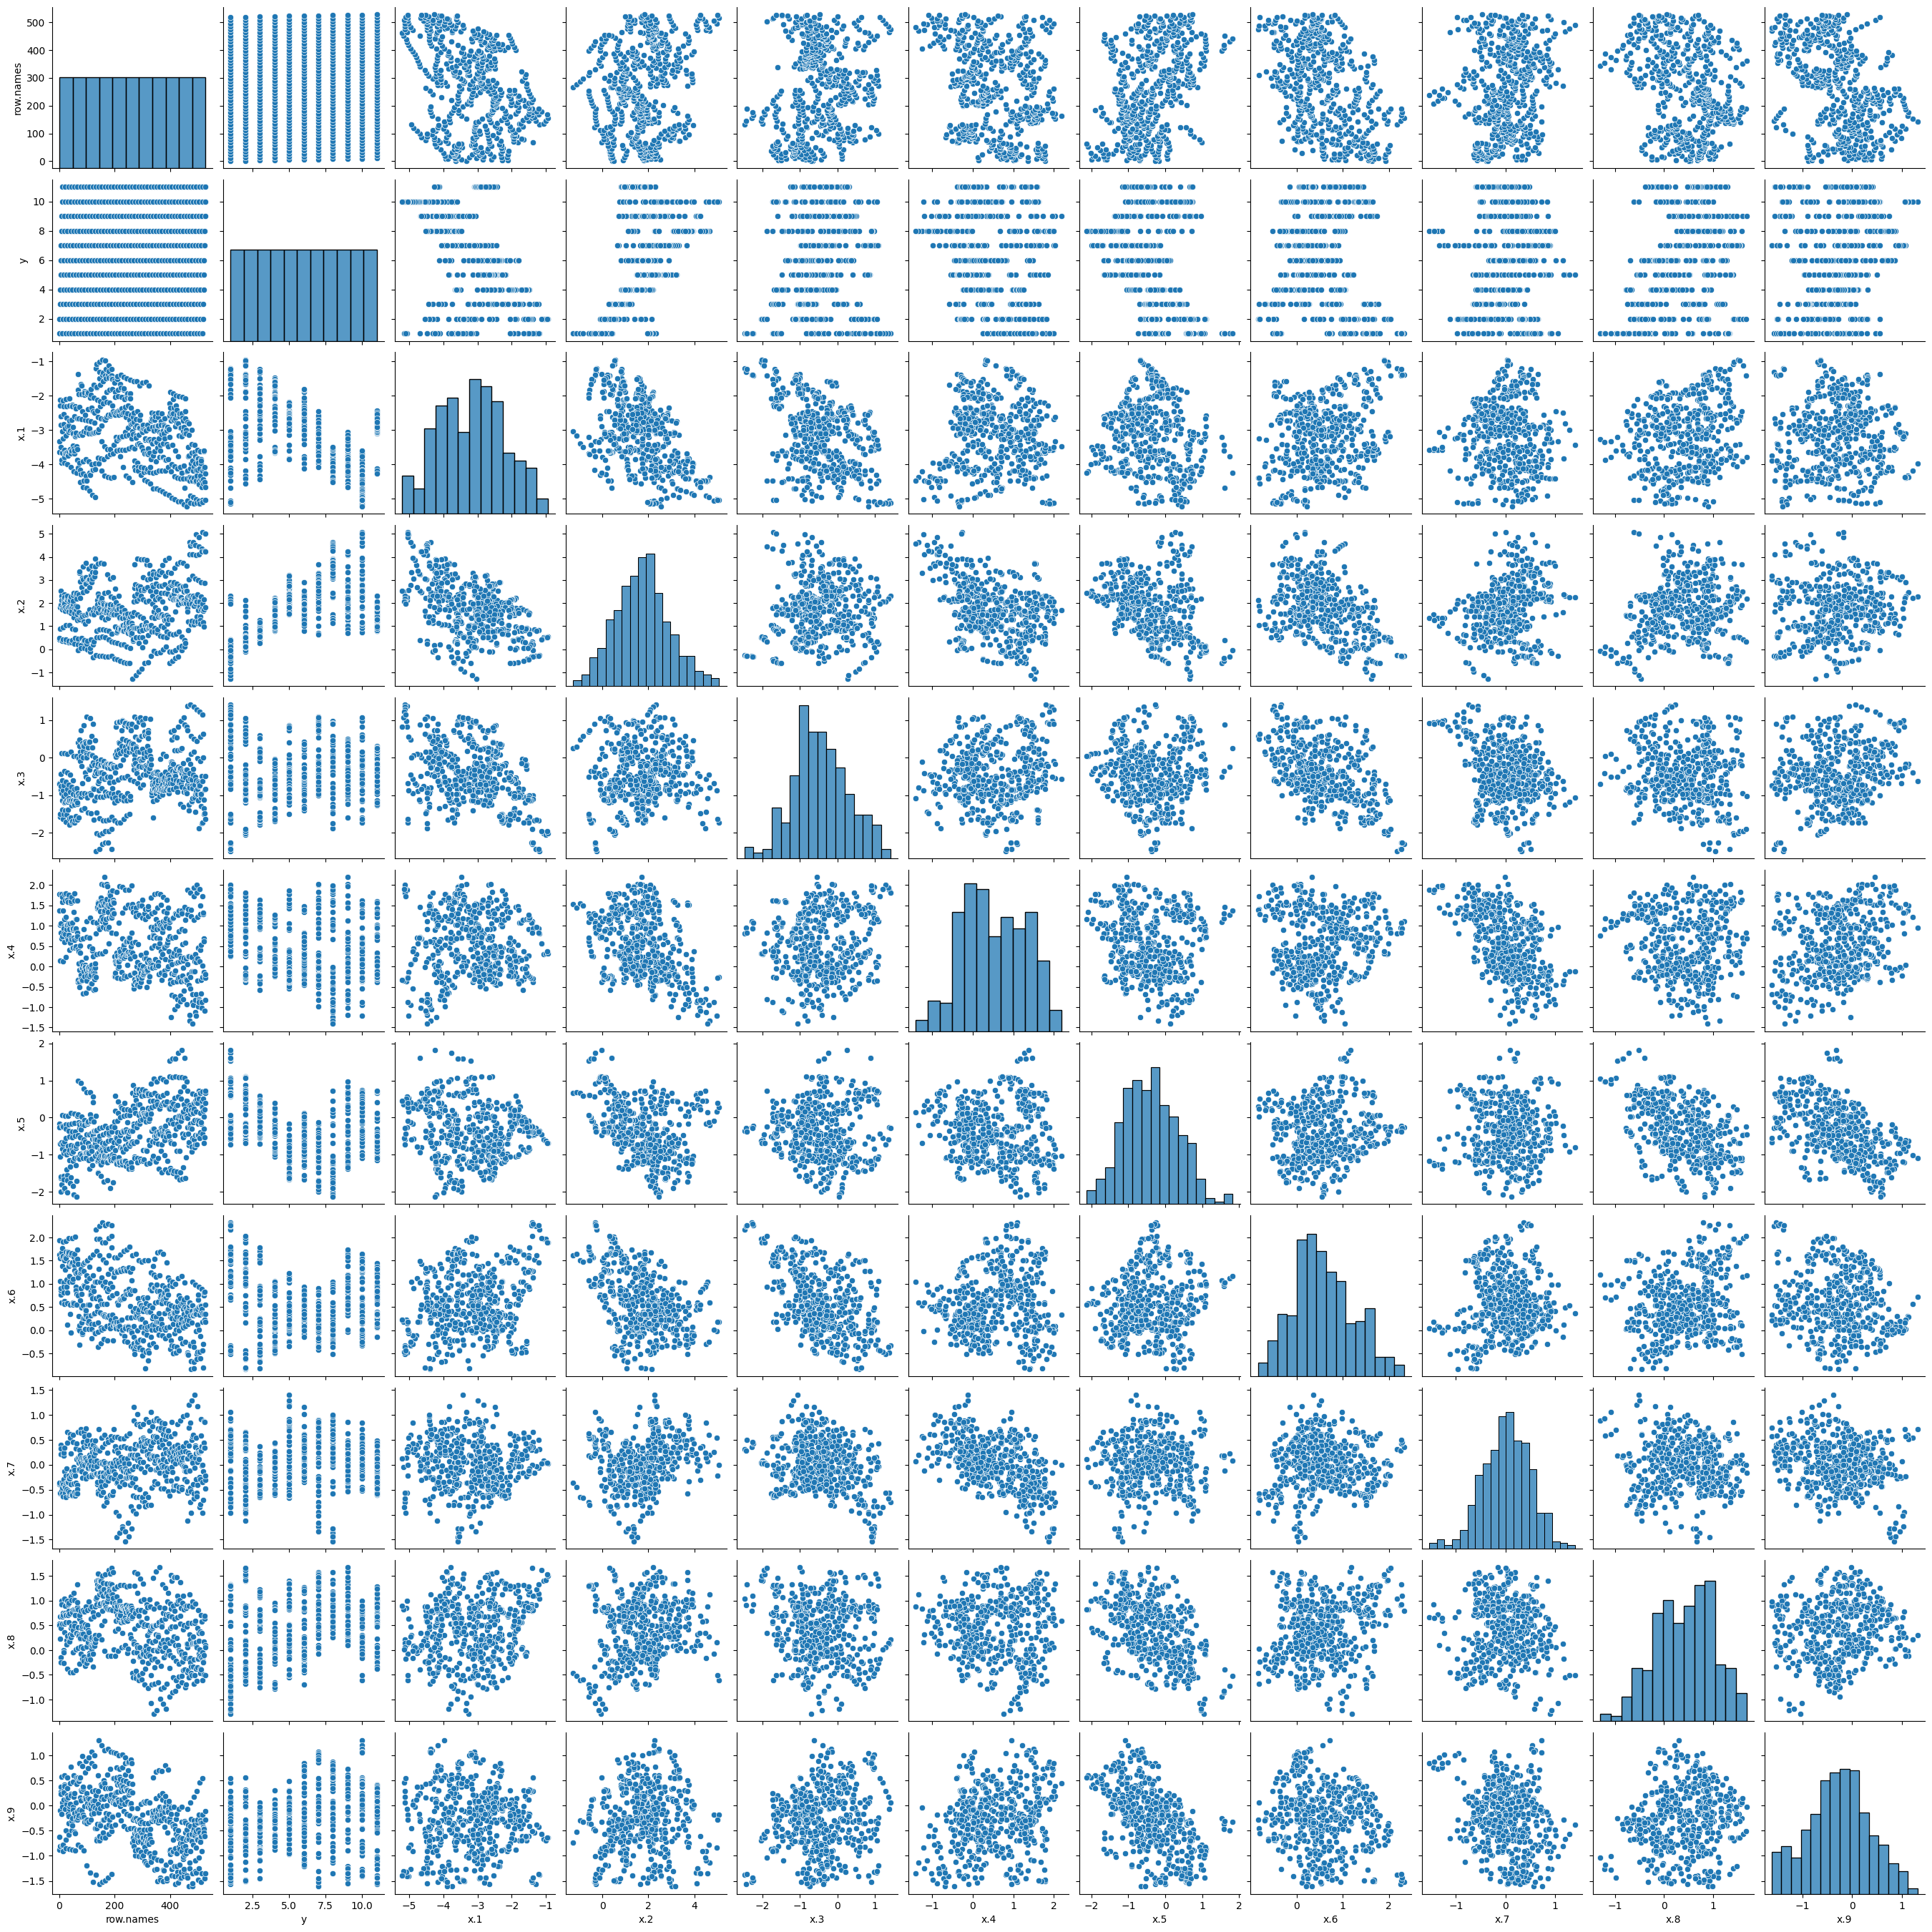

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = dataset_new.iloc[:, :-1].corr()

# Plotting the pairplot with correlation coefficients annotated on the upper panel
sns.pairplot(dataset_new.iloc[:, :-1])  # <- Missing opening parenthesis here
for i, (ax_row, row) in enumerate(zip(plt.gcf().axes, correlation_matrix)):
    for j, (ax, value) in enumerate(zip(ax_row, correlation_matrix[row])):
        ax.annotate(f"{value:.2f}", xy=(0.5, 0.5), xycoords=ax.transAxes,
                    ha='center', va='center', fontsize=8, color='red')
plt.show()



In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the features for PCA
X_train_pca = train_set.iloc[:, :-1]  # Exclude the target variable

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)

# Perform PCA
pca = PCA()
pca.fit(X_train_scaled)

# Print PCA results
print("Principal components:")
print(pca.components_)
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:")
print(np.cumsum(pca.explained_variance_ratio_))


Principal components:
[[-0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777
  -0.31622777 -0.31622777 -0.31622777 -0.31622777]
 [-0.31622777 -0.07597469  0.92402531 -0.07597469 -0.07597469 -0.07597469
  -0.07597469 -0.07597469 -0.07597469 -0.07597469]
 [-0.31622777 -0.07597469 -0.07597469  0.92402531 -0.07597469 -0.07597469
  -0.07597469 -0.07597469 -0.07597469 -0.07597469]
 [-0.31622777 -0.07597469 -0.07597469 -0.07597469  0.92402531 -0.07597469
  -0.07597469 -0.07597469 -0.07597469 -0.07597469]
 [-0.31622777  0.92402531 -0.07597469 -0.07597469 -0.07597469 -0.07597469
  -0.07597469 -0.07597469 -0.07597469 -0.07597469]]
Explained variance ratio:
[1. 0. 0. 0. 0.]
Cumulative explained variance ratio:
[1. 1. 1. 1. 1.]


TypeError: 'Axes' object is not subscriptable

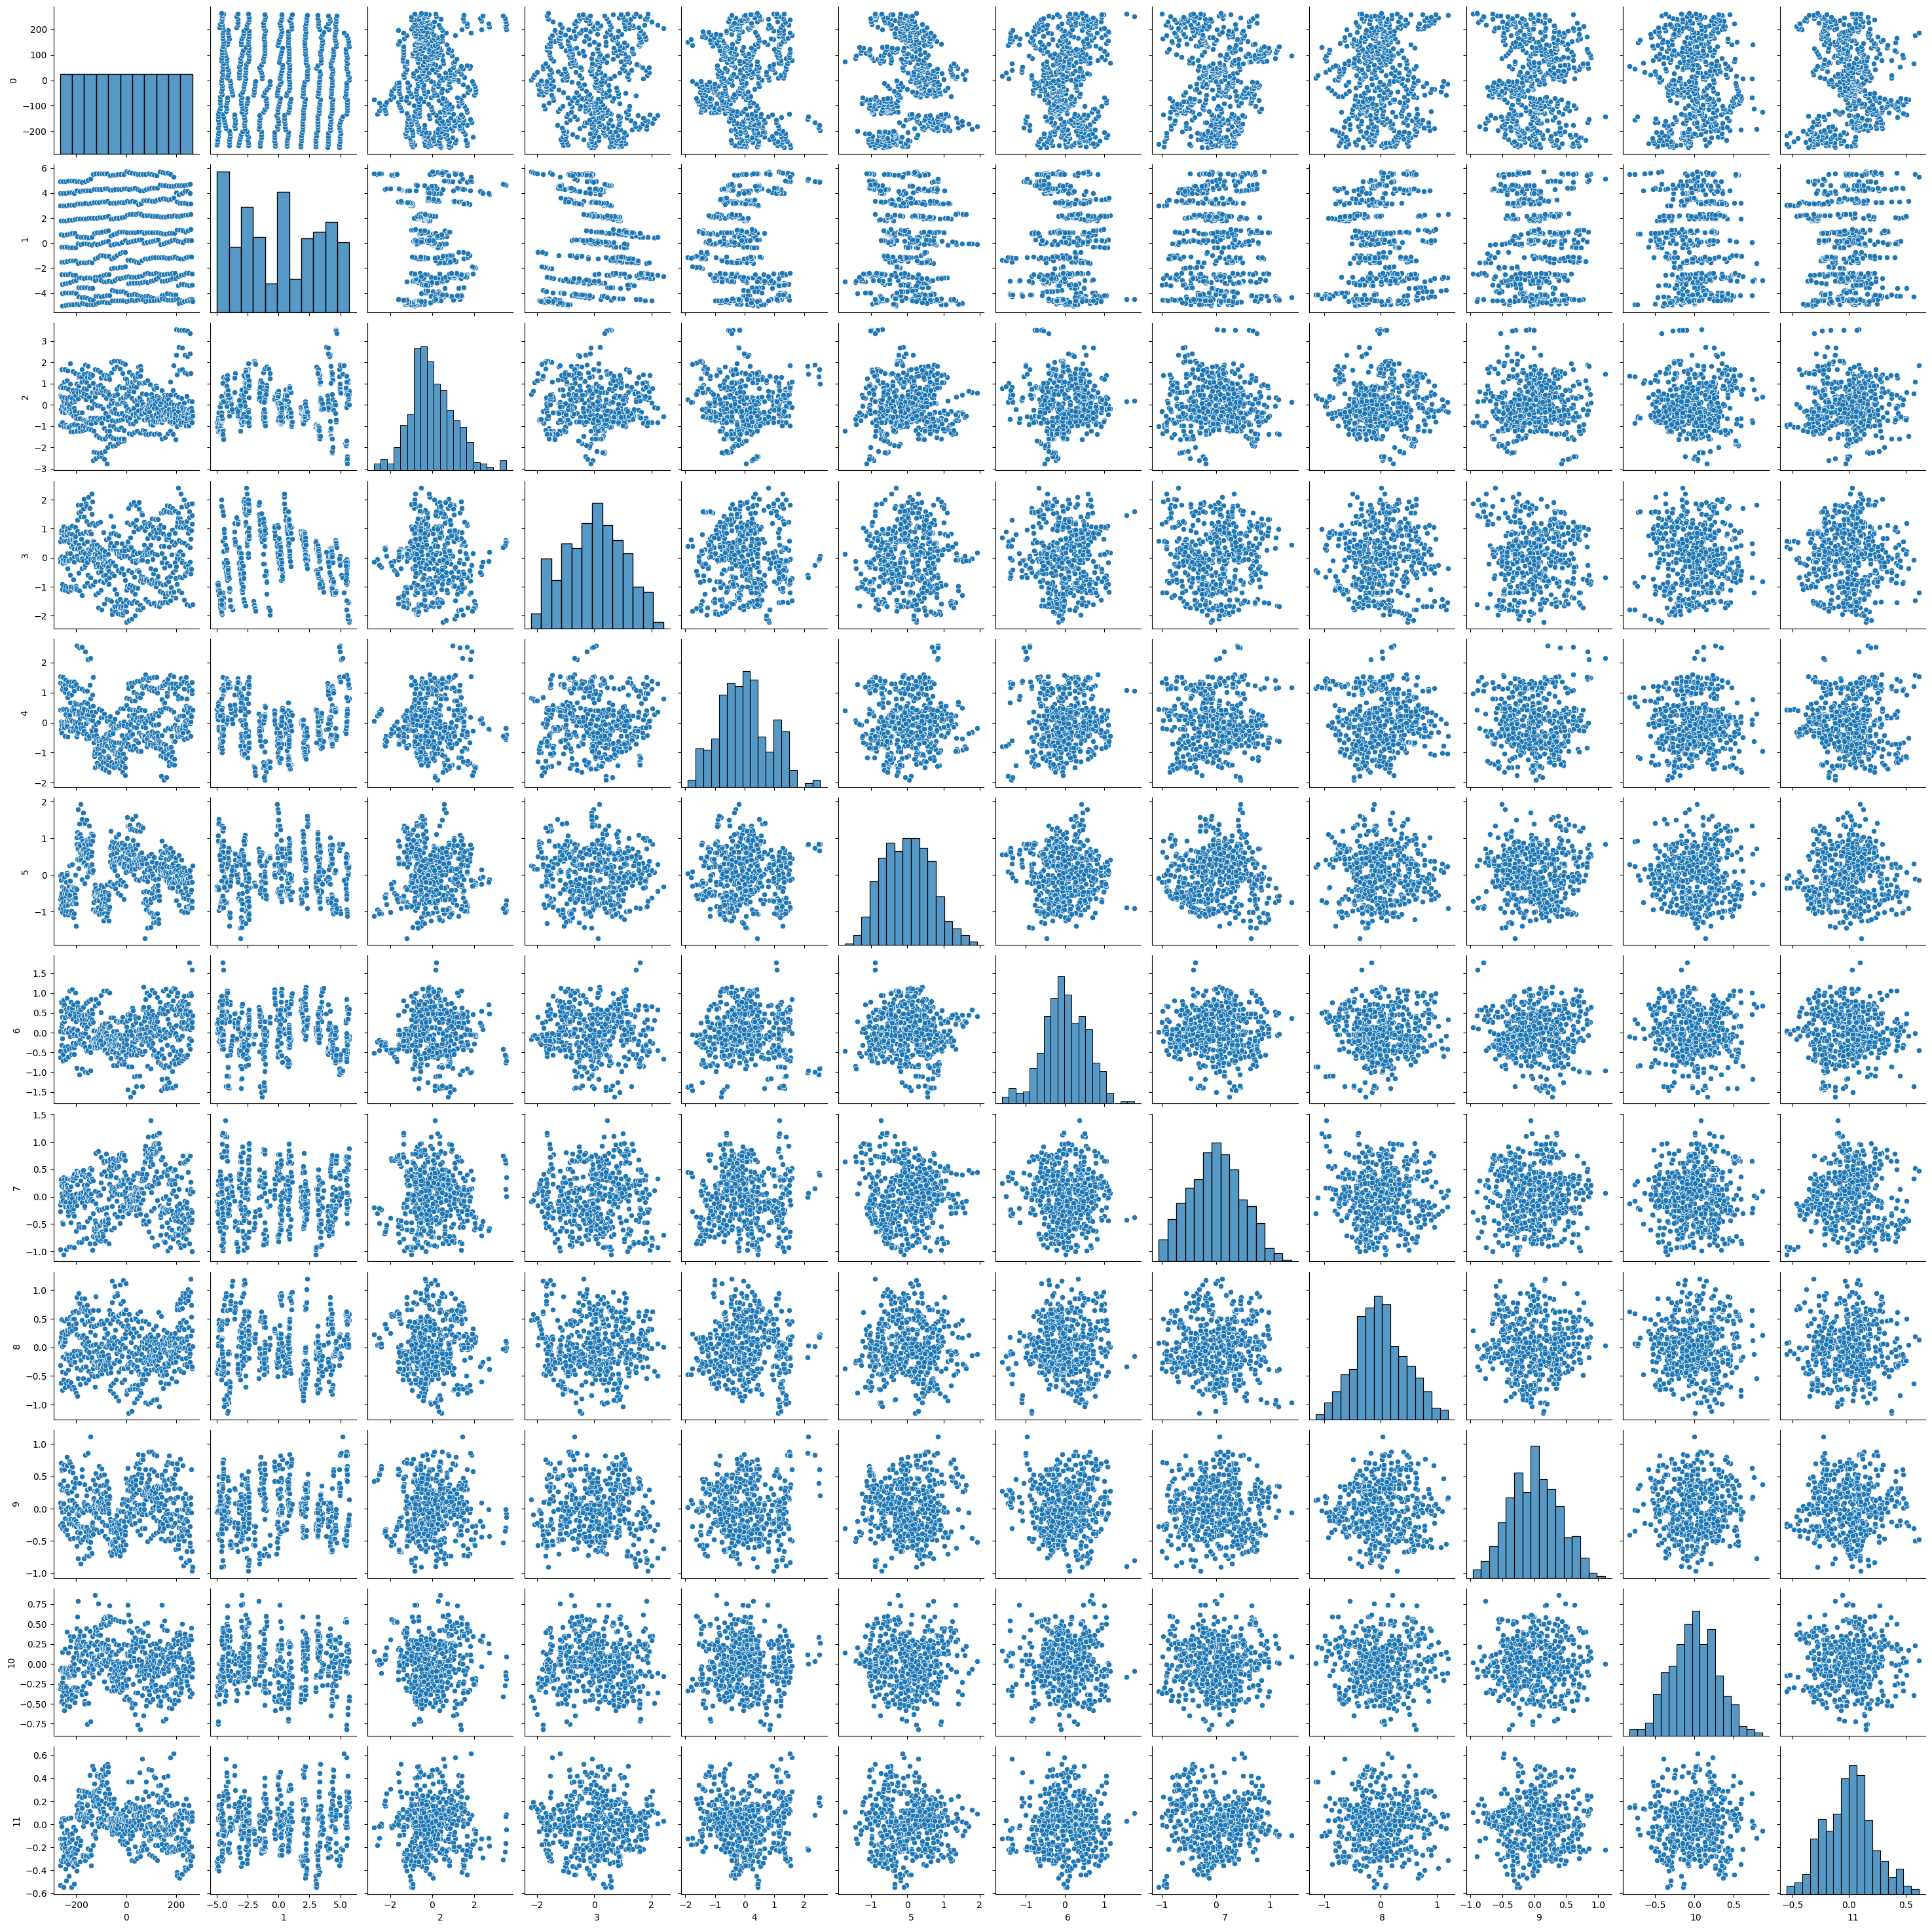

In [42]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined or imported the dataset as 'data'

# Perform PCA
pca = PCA()
transformed_data = pca.fit_transform(pd.read_csv("E:\\Desktop\\vowel.train.txt"))

# Calculate the correlation matrix for the principal components
correlation_matrix_pca = np.corrcoef(transformed_data, rowvar=False)

# Plotting the pairplot with correlation coefficients annotated on the upper panel
sns.pairplot(pd.DataFrame(transformed_data))
for i, row in enumerate(correlation_matrix_pca):
    for j, value in enumerate(row):
        ax = plt.gcf().axes[i][j]
        ax.annotate(f"{value:.2f}", xy=(0.5, 0.5), xycoords=ax.transAxes,
                    ha='center', va='center', fontsize=8, color='red')
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression

# Define the features and target variable for the training set
X_train_pca = train_set.iloc[:, :-1]  # Exclude the target variable
y_train = train_set['y_level']

# Define the features and target variable for the test set
X_test_pca = test_set.iloc[:, :-1]  # Exclude the target variable
# Assuming the column name is different, replace 'y' with the correct column name
y_test = test_set['y_level']

# Create and train the logistic regression model using principal components
pca_model = LogisticRegression()
pca_model.fit(X_train_pca, y_train)

# Make predictions on the test set using the PCA model
predictions_pca = pca_model.predict(X_test_pca)

# Print the summary of the PCA model (coefficients, etc.)
print("Intercept:", pca_model.intercept_)
print("Coefficients:", pca_model.coef_)


Intercept: [1.79767079e-06]
Coefficients: [[0.00018307 0.00020104 0.00021901 0.00023699 0.00025496 0.00027293
  0.0002909  0.00030887 0.00032684 0.00034481]]


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import joblib

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Train the logistic regression model using scaled features
pca_model = LogisticRegression()
pca_model.fit(X_train_scaled, y_train)

# 1. Make predictions on the training and test datasets
train_predicted_probs = pca_model.predict_proba(X_train_scaled)[:, 1]
test_predicted_probs = pca_model.predict_proba(X_test_scaled)[:, 1]

# 2. Convert predicted probabilities to predicted class labels
train_predicted_class = (train_predicted_probs >= 0.5).astype(int)
test_predicted_class = (test_predicted_probs >= 0.5).astype(int)

# 3. Compute accuracy on the training and test datasets
train_accuracy = accuracy_score(y_train, train_predicted_class)
test_accuracy = accuracy_score(y_test, test_predicted_class)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# 4. Create a confusion matrix
confusion_matrix_test = confusion_matrix(y_test, test_predicted_class)
print("\nConfusion Matrix - Test:")
print(confusion_matrix_test)

# Save the model and scaler
joblib.dump(pca_model, 'pca_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("Principal Component Model and Scaler Saved Successfully")


Training Accuracy: 0.6
Test Accuracy: 0.6666666666666666

Confusion Matrix - Test:
[[0 1]
 [0 2]]
Principal Component Model and Scaler Saved Successfully


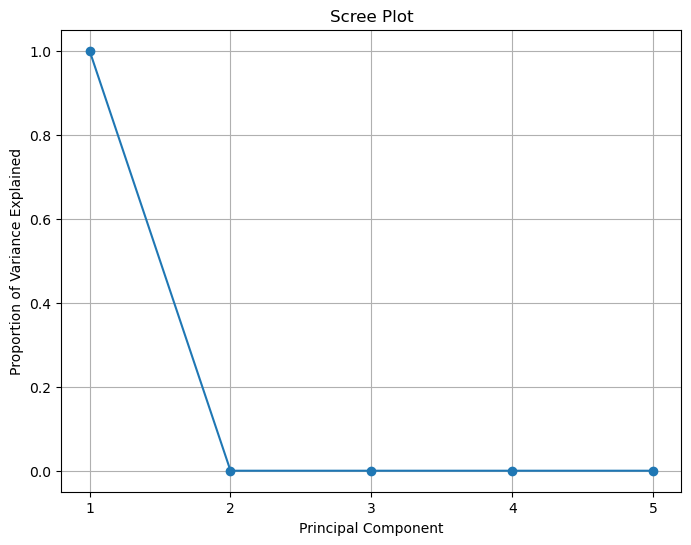

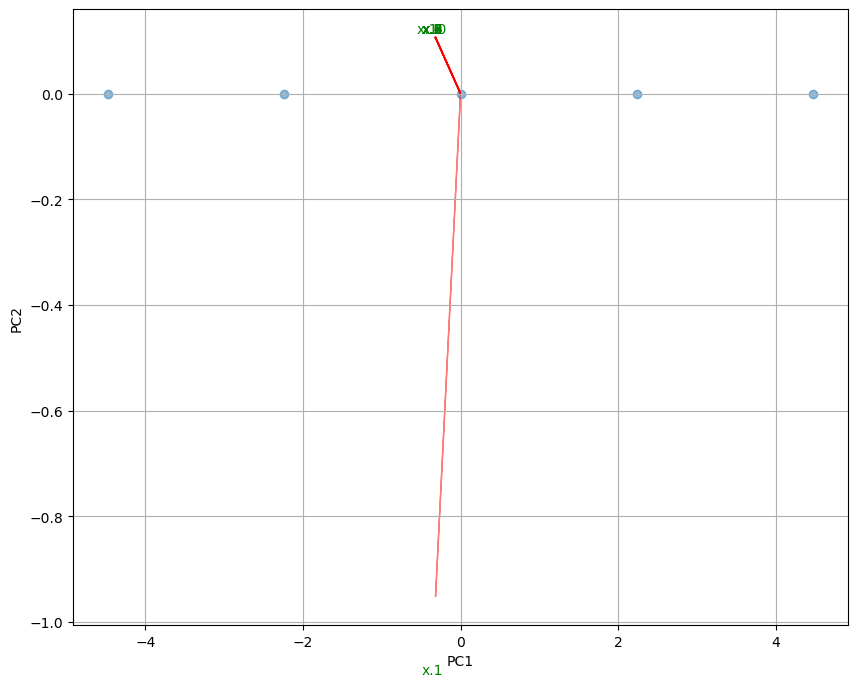

In [32]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA()
pca.fit(X_train_scaled)  # Assuming you have standardized your data as X_train_scaled

# Get the principal components
PC_scores = pca.transform(X_train_scaled)

# Create a DataFrame to store the principal components
PC_df = pd.DataFrame(PC_scores, columns=[f"PC{i+1}" for i in range(PC_scores.shape[1])])

# Plotting the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

# Biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(score[:,0], score[:,1], alpha=0.5)
    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.show()

biplot(PC_scores[:, 0:2], pca.components_.T, labels=X_train.columns)


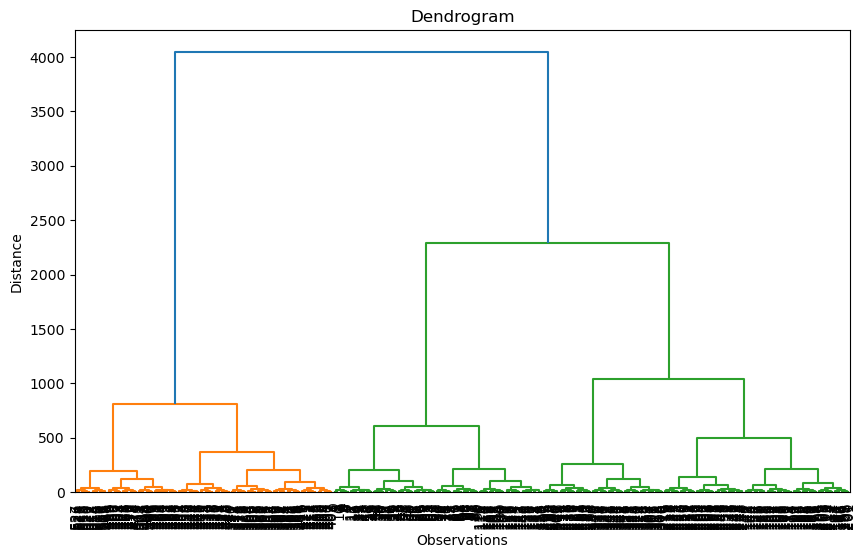

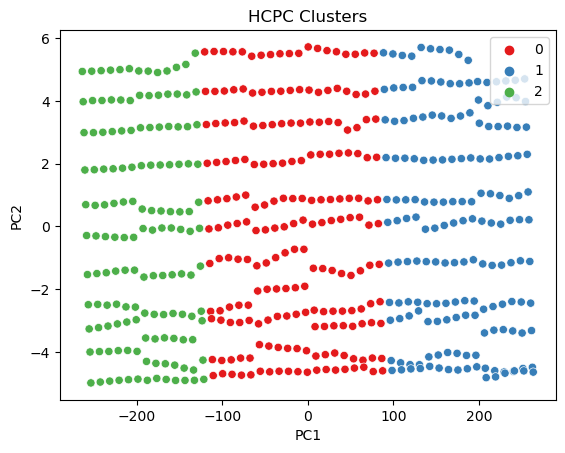

In [33]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute PCA
pca = PCA(n_components=10)  # Set n_components according to your requirement
data = pd.read_csv("E:\\Desktop\\vowel.train.txt")
PC_scores = pca.fit_transform(data.iloc[:, :-1])  # Exclude the target variable

# Perform hierarchical clustering on principal components
hcpc = linkage(PC_scores, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(hcpc, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels
# Replace this part with your actual clustering algorithm and obtaining cluster labels
# For example, if you're using AgglomerativeClustering:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = clusterer.fit_predict(PC_scores)

# Visualize cluster centroids
sns.scatterplot(x=PC_scores[:, 0], y=PC_scores[:, 1], hue=cluster_labels, palette='Set1')
plt.title('HCPC Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
